In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("car-data.csv")

In [113]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [115]:
print(f'The categorical data is as follows: Car Name, Fuel Type, Seller Type, and Transmission.')
print(f'The numerical data is as follows: Year, Selling Price, Present Price, Kms Driven, and Owner.\n')
data.info()
print(f'\nThere is no missing data')

The categorical data is as follows: Car Name, Fuel Type, Seller Type, and Transmission.
The numerical data is as follows: Year, Selling Price, Present Price, Kms Driven, and Owner.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

There is no missing data


In [116]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [117]:
data['Fuel_Type'].value_counts()
data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

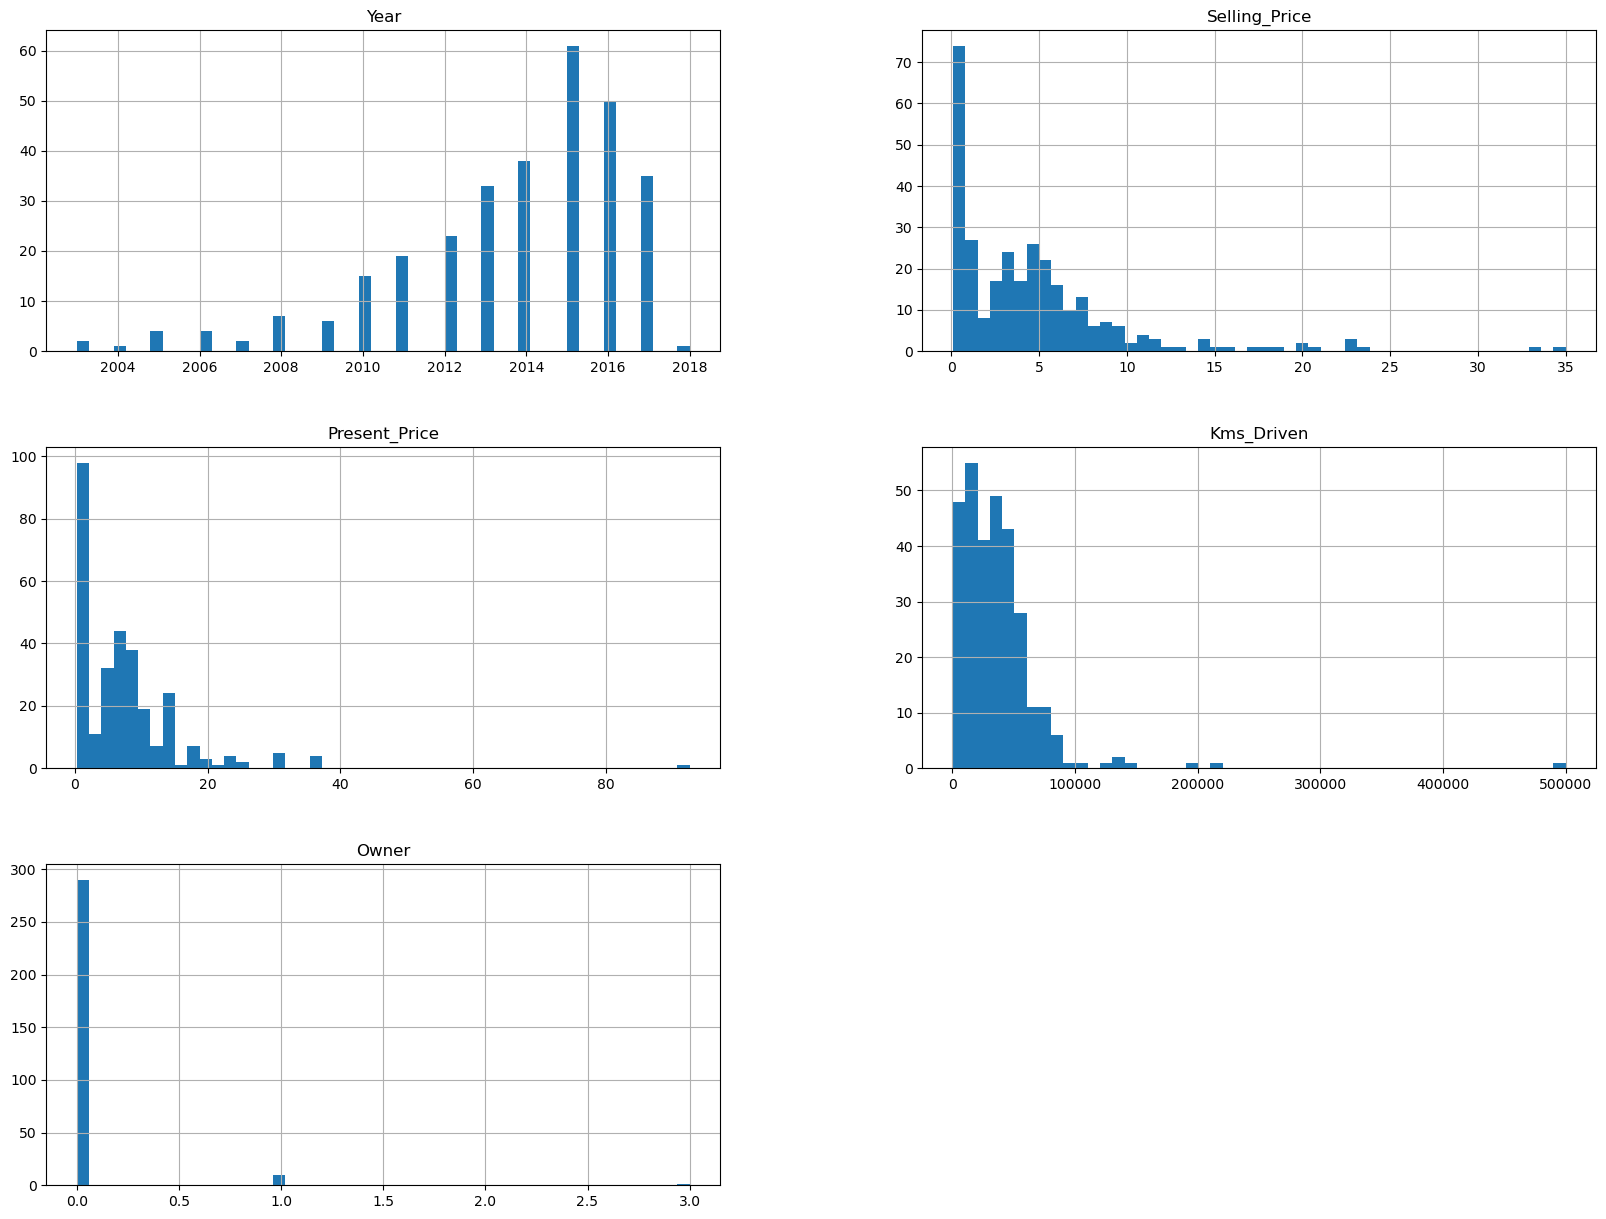

In [118]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [119]:
data['Year_Cat'] = pd.cut(data['Year'],
                          bins=[0, 2010, 2012, 2014, 2016, np.inf],
                          labels=[1, 2, 3, 4, 5])

# Stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Year_Cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Remove the 'Year_Cat' attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Year_Cat', axis=1, inplace=True)

In [120]:
numerical_strat_train_set = strat_train_set.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], axis=1)

# Now, calculate the correlation matrix
correlation_matrix = numerical_strat_train_set.corr()
selling_price_correlation = correlation_matrix['Selling_Price'].sort_values(ascending=False)
print(selling_price_correlation)

Selling_Price    1.000000
Present_Price    0.891265
Year             0.225452
Kms_Driven       0.029246
Owner           -0.095953
Name: Selling_Price, dtype: float64


array([[<Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <Axes: xlabel='Year', ylabel='Selling_Price'>],
       [<Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Present_Price'>,
        <Axes: xlabel='Year', ylabel='Present_Price'>],
       [<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>,
        <Axes: xlabel='Present_Price', ylabel='Kms_Driven'>,
        <Axes: xlabel='Kms_Driven', ylabel='Kms_Driven'>,
        <Axes: xlabel='Year', ylabel='Kms_Driven'>],
       [<Axes: xlabel='Selling_Price', ylabel='Year'>,
        <Axes: xlabel='Present_Price', ylabel='Year'>,
        <Axes: xlabel='Kms_Driven', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

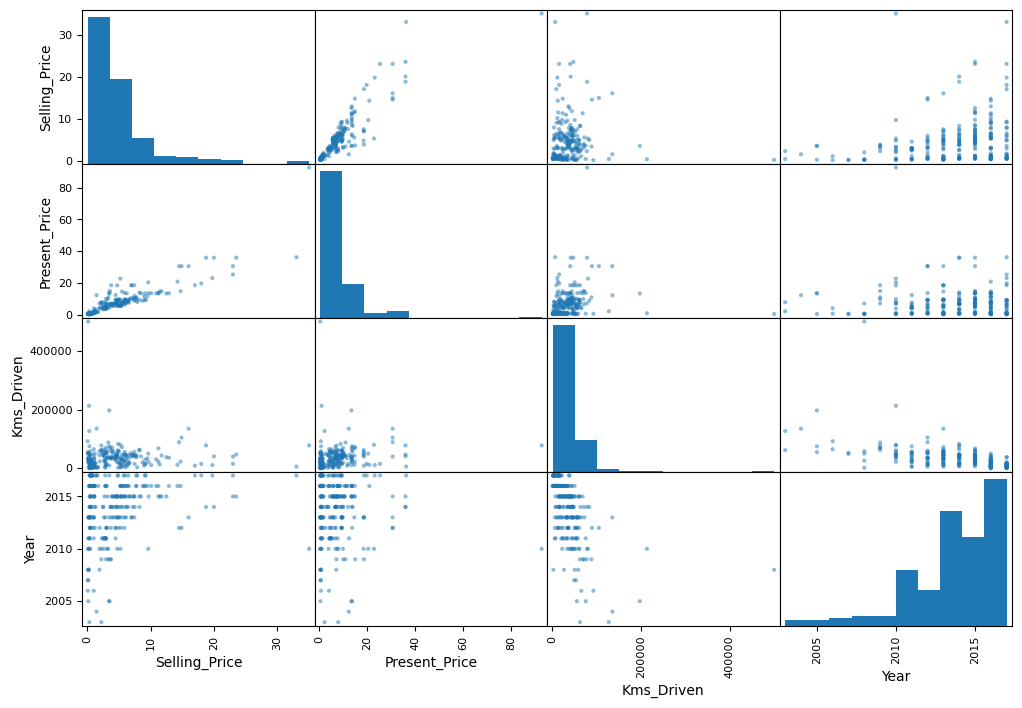

In [121]:
attributes = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']
scatter_matrix(strat_train_set[attributes], figsize=(12, 8))


In [122]:
current_year = strat_train_set['Year'].max() + 1
strat_train_set['Kms_Per_Year'] = strat_train_set['Kms_Driven'] / (current_year - strat_train_set['Year'])

In [123]:
numeric_columns = strat_train_set.select_dtypes(include=[np.number])
new_correlation_matrix = numeric_columns.corr()
new_selling_price_correlation = new_correlation_matrix['Selling_Price'].sort_values(ascending=False)
print(new_selling_price_correlation)

Selling_Price    1.000000
Present_Price    0.891265
Kms_Per_Year     0.291110
Year             0.225452
Kms_Driven       0.029246
Owner           -0.095953
Name: Selling_Price, dtype: float64


In [124]:
cars_inputs = strat_train_set.drop('Selling_Price', axis=1)
cars_labels = strat_train_set['Selling_Price'].copy()

In [125]:
categorical_attributes = ['Fuel_Type', 'Seller_Type', 'Transmission']
full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_attributes),
])

cars_inputs_prepared = full_pipeline.fit_transform(cars_inputs)

In [132]:
class AddKmsPerYearAttribute(BaseEstimator, TransformerMixin):
    def __init__(self, add_kms_per_year=True, year_index=1, kms_driven_index=3):
        self.add_kms_per_year = add_kms_per_year
        self.year_index = year_index
        self.kms_driven_index = kms_driven_index

    def fit(self, X, y=None):
        return self  # Nothing else to do

    def transform(self, X):
        if self.add_kms_per_year:
            current_year = np.max(X[:, self.year_index]) + 1
            kms_per_year = X[:, self.kms_driven_index] / (current_year - X[:, self.year_index])
            return np.c_[X, kms_per_year]
        else:
            return X


In [133]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('add_kms_per_year', AddKmsPerYearAttribute()),
    ('std_scaler', StandardScaler()),
])

In [134]:
num_attribs = list(cars_inputs.select_dtypes(include=[np.number]))
cat_attribs = ['Fuel_Type', 'Seller_Type', 'Transmission']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

cars_prepared = full_pipeline.fit_transform(cars_inputs)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_labels)

cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(cars_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"Linear Regression RMSE: {lin_rmse}")


Linear Regression RMSE: 1.7429814540212405


In [136]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, cars_labels)

cars_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(cars_labels, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"Decision Tree RMSE: {tree_rmse}")

Decision Tree RMSE: 6.206335383118182e-18


In [137]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, cars_prepared, cars_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("Decision Tree Cross-Validation RMSE scores:", tree_rmse_scores)


Decision Tree Cross-Validation RMSE scores: [1.10918889 1.25612665 1.17842409 2.16786665 1.56719893 5.27824071
 1.04715488 0.91806636 0.56656494 2.99424517]


In [138]:
lin_scores = cross_val_score(lin_reg, cars_prepared, cars_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Linear Regression Cross-Validation RMSE scores:", lin_rmse_scores)


Linear Regression Cross-Validation RMSE scores: [1.03810403 2.0477643  1.22794714 1.89056759 2.28051659 3.27133967
 1.12400099 1.40129886 2.85335559 3.24482411]


In [139]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, cars_prepared, cars_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Random Forest Cross-Validation RMSE scores:", forest_rmse_scores)

forest_reg.fit(cars_prepared, cars_labels)  # Train on the entire training set


Random Forest Cross-Validation RMSE scores: [0.41511223 1.21494273 0.82880465 2.24881514 1.57337607 3.58711451
 0.43057651 0.65828677 0.86516408 2.30883647]


RandomForestRegressor()

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(cars_prepared, cars_labels)

print("Best parameters:", grid_search.best_params_)
print("Feature importances:", grid_search.best_estimator_.feature_importances_)


Best parameters: {'max_features': 8, 'n_estimators': 3}
Feature importances: [6.16612585e-02 3.01527991e-01 2.07559945e-02 2.24983311e-05
 2.57778705e-02 1.13251091e-06 2.49173492e-05 2.72274116e-01
 7.10196084e-02 1.30554436e-03 2.14110124e-03 2.77780751e-04
 2.43210186e-01]


In [141]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(cars_prepared)
final_mse = mean_squared_error(cars_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Final RMSE: {final_rmse}")


Final RMSE: 1.1520939872925107


In [147]:
current_year = strat_test_set['Year'].max() + 1
strat_test_set['Kms_Per_Year'] = strat_test_set['Kms_Driven'] / (current_year - strat_test_set['Year'])

cars_test_prepared = full_pipeline.transform(strat_test_set.drop("Selling_Price", axis=1))

test_labels = strat_test_set["Selling_Price"].copy()
final_predictions = final_model.predict(cars_test_prepared)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Test RMSE: {final_rmse}")


Test RMSE: 1.589183153868415


In [150]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, final_predictions)
print(f"Coefficient of determination (R²) on test set: {r2}")

Coefficient of determination (R²) on test set: 0.8721863709659159


In [151]:
import joblib

# Save the model to disk
filename = 'finalized_model.sav'
joblib.dump(final_model, filename)

['finalized_model.sav']